In [1]:
from matplotlib import pyplot as plt
import numpy as np

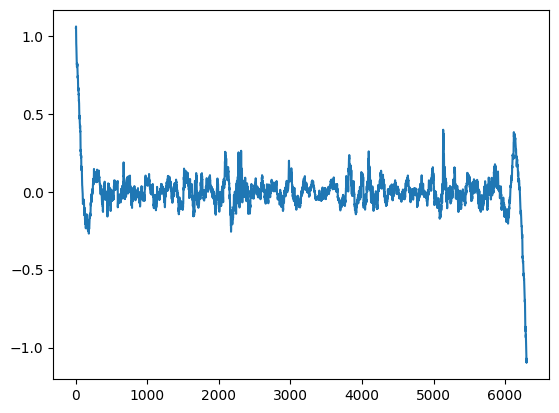

In [23]:
from finko import data

import numpy as np

def high_pass_filter(S, cutoff_frequency=5):
    """
    Applies a high-pass filter to the stock price series S.
    
    Parameters:
        S (np.ndarray): 1D numpy array of stock prices.
        cutoff_frequency (int): Frequency threshold for filtering (low frequencies below this are removed).
    
    Returns:
        np.ndarray: High-pass filtered stock prices.
    """
    # Ensure S is a numpy array
    S = np.asarray(S)
    
    # Perform FFT
    freq_domain = np.fft.fft(S)
    
    # Create a high-pass filter
    n = len(S)
    filter_mask = np.zeros(n, dtype=bool)
    filter_mask[cutoff_frequency:n-cutoff_frequency] = True  # Keep high frequencies
    
    # Apply the filter
    filtered_freq_domain = freq_domain * filter_mask
    
    # Perform inverse FFT
    filtered_S = np.fft.ifft(filtered_freq_domain)
    
    # Return the real part of the filtered signal
    return np.real(filtered_S)


df = data.get("EQNR")
rsi = -high_pass_filter(df["S"],20)
plt.plot(rsi)

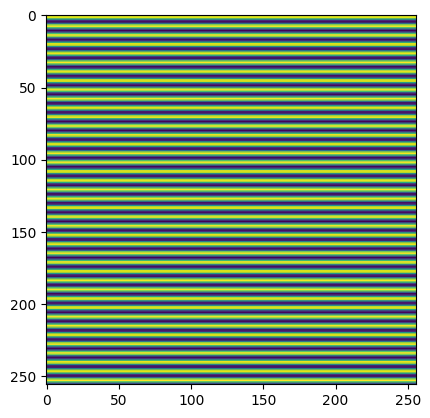

In [2]:
img = np.zeros((256,256))

significant_terms = np.array([
    [1,0, 1, 0]
])

for coef_x, coef_y, ampl, phase in significant_terms:
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            img[x,y] += ampl * np.sin(phase + x*coef_x+y*coef_y)

plt.imshow(img)

In [9]:
#import pydicom as dicom
import nibabel as nib
import numpy as np
from matplotlib import pyplot as plt

path = "../../Data/Temp/ADNI_136_S_1227_MR_MPR____N3__Scaled_Br_20070810000731580_S26837_I66824.nii"    
img = nib.load(path).get_fdata()
img.shape

(256, 256, 170)

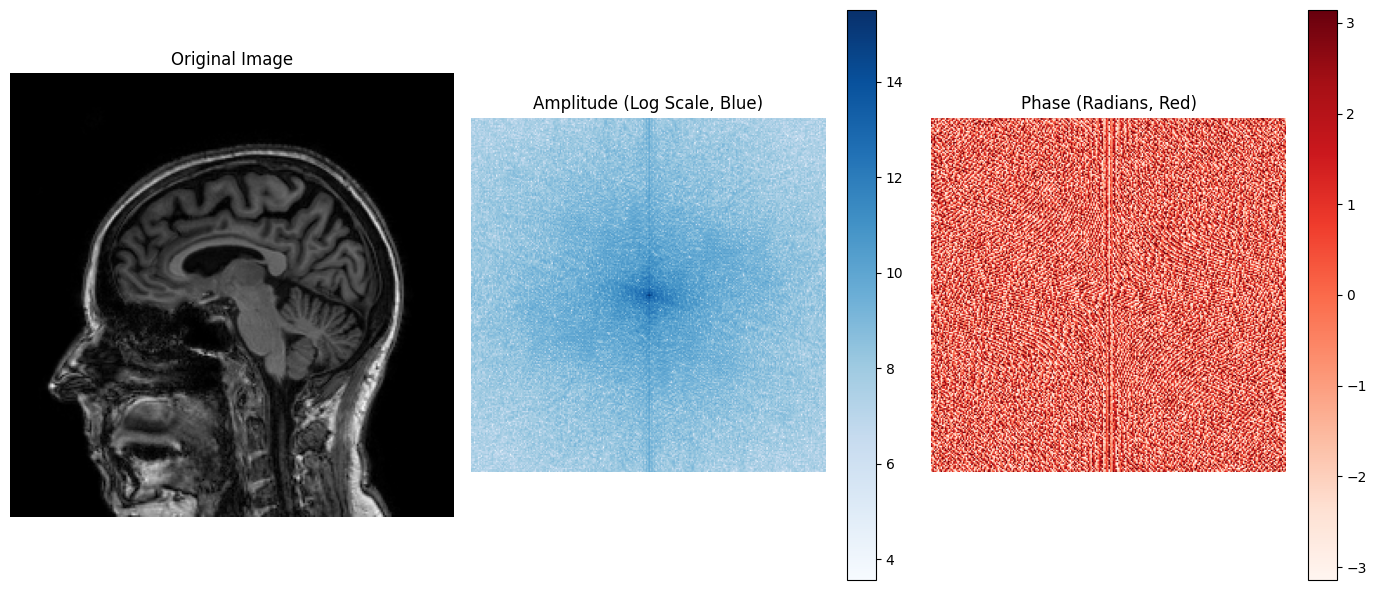

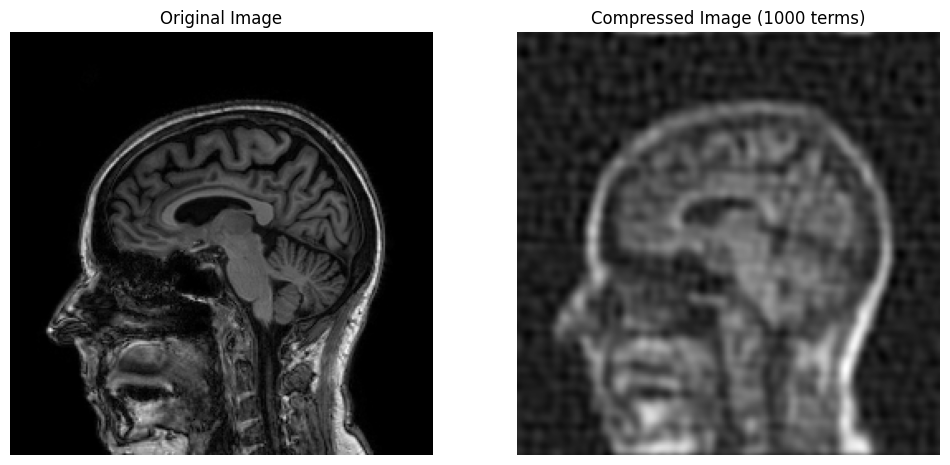

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft2, ifft2, fftshift, ifftshift

# Load the image
image_path = "../../Data/Temp/test.png"
original_img = plt.imread(image_path)
if original_img.ndim == 3:
    original_img = img[:,:,80]#np.mean(original_img, axis=2)  # Convert to grayscale if needed

# Compression
def compress_image(image, num_terms=10):
    # Apply 2D Fourier Transform
    freq_domain = fft2(image)
    freq_domain_shifted = fftshift(freq_domain)  # Shift zero frequency to center
    
    # Sort by magnitude
    magnitude = np.abs(freq_domain_shifted)
    indices = np.unravel_index(np.argsort(-magnitude.ravel()), magnitude.shape)
    
    # Retain top `num_terms` coefficients
    compressed_freq = np.zeros_like(freq_domain_shifted, dtype=complex)
    for i in range(num_terms):
        x, y = indices[0][i], indices[1][i]
        compressed_freq[x, y] = freq_domain_shifted[x, y]
    
    # Reconstruct compressed image
    compressed_freq_shifted_back = ifftshift(compressed_freq)
    reconstructed_img = np.real(ifft2(compressed_freq_shifted_back))
    return reconstructed_img, freq_domain_shifted, compressed_freq

# Apply compression
num_terms = 1000  # Number of significant terms to retain
compressed_img, freq_domain_shifted, compressed_freq = compress_image(original_img, num_terms=num_terms)

# Plotting the frequency representation
amplitude = np.log1p(np.abs(freq_domain_shifted))  # Log scale for better visibility
phase = np.angle(freq_domain_shifted)

plt.figure(figsize=(14, 6))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(original_img, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Amplitude (Log Scale, Blue)")
plt.imshow(amplitude, cmap='Blues')
plt.colorbar()
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Phase (Radians, Red)")
plt.imshow(phase, cmap='Reds')
plt.colorbar()
plt.axis('off')

plt.tight_layout()
plt.show()

# Visualization of compressed image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(original_img, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f"Compressed Image ({num_terms} terms)")
plt.imshow(compressed_img, cmap='gray')
plt.axis('off')

plt.show()
